In [1]:
%matplotlib inline
from ipywidgets import interact, widgets

In [2]:
import numpy as np
import cv2 as cv
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
files = list(Path(r"C:\Samples").glob("*_logo.png"))

In [4]:
def ShowPic(path):
    img = cv.imread(str(path), 0)
    #img = cv.GaussianBlur(img, (17,17), 0)
    plt.imshow(img)

interact(ShowPic, 
         path=widgets.Dropdown(options=files, value=files[0]))

interactive(children=(Dropdown(description='path', options=(WindowsPath('C:/Samples/1997.820-2386.809_logo.png…

<function __main__.ShowPic(path)>

In [5]:
def drawEdges(path, threshold1, threshold2):
    img = cv.imread(str(path), 0)
    print(f'image mean: {np.mean(img)}, median: {np.median(img)}, std: {np.std(img)}')
    #median = np.median(img)
    #threshold1, threshold2 = 0.66 * median, 1.33 * median
    edges = cv.Canny(img, threshold1, threshold2, apertureSize=3)
    plt.imshow(edges)
    edgePath = path.with_suffix('.edge.png')
    cv.imwrite(str(edgePath), edges)

interact(drawEdges,
         path=widgets.Dropdown(options=files, value=files[0]),
         threshold1=widgets.IntSlider(min=0, max=128, value=32),
         threshold2=widgets.IntSlider(min=0, max=128, value=64))

interactive(children=(Dropdown(description='path', options=(WindowsPath('C:/Samples/1997.820-2386.809_logo.png…

<function __main__.drawEdges(path, threshold1, threshold2)>

In [6]:
from PIL import Image

videoEdge = np.array(Image.open(r"C:\Samples\2021年01月05日19時30分00秒-美少女戦士セーラームーンCrystal #2_CS1(330)-1_logo.edge.png"))
clipEdge = np.array(Image.open(r"C:\Samples\2021年01月18日19時30分00秒-美少女戦士セーラームーンCrystal #11_trimmed_logo.edge.png"))

0.20301839983460823


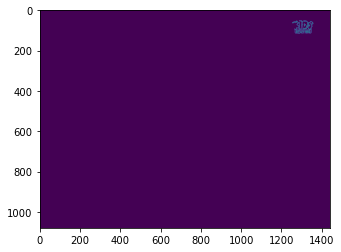

In [7]:
andImage = np.bitwise_and(videoEdge, clipEdge)
plt.imshow(andImage)
logoScore = np.sum(andImage) / np.sum(videoEdge)
print(logoScore)